In [266]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [267]:
warnings.filterwarnings('ignore')

In [268]:
data = pd.read_csv("/content/GRASIM.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,GRASIM,EQ,405.80,429.9,438.3,425.00,438.3,438.30,432.24,101578,4.390621e+12,NaN,NaN,NaN
1,2000-01-04,GRASIM,EQ,438.30,437.5,440.0,420.05,439.5,437.15,428.27,126117,5.401216e+12,NaN,NaN,NaN
2,2000-01-05,GRASIM,EQ,437.15,420.1,447.9,412.00,430.0,439.60,436.10,163877,7.146660e+12,NaN,NaN,NaN
3,2000-01-06,GRASIM,EQ,439.60,449.9,474.8,449.90,474.8,474.80,474.68,44248,2.100384e+12,NaN,NaN,NaN
4,2000-01-07,GRASIM,EQ,474.80,472.0,512.8,472.00,512.8,512.80,512.61,188564,9.666049e+12,NaN,NaN,NaN


In [269]:
data.drop(['Date'], axis=1, inplace=True)

In [270]:
print(data.head())
print(data.shape)
print(data.columns)

   Symbol Series  Prev Close   Open   High     Low   Last   Close    VWAP  \
0  GRASIM     EQ      405.80  429.9  438.3  425.00  438.3  438.30  432.24   
1  GRASIM     EQ      438.30  437.5  440.0  420.05  439.5  437.15  428.27   
2  GRASIM     EQ      437.15  420.1  447.9  412.00  430.0  439.60  436.10   
3  GRASIM     EQ      439.60  449.9  474.8  449.90  474.8  474.80  474.68   
4  GRASIM     EQ      474.80  472.0  512.8  472.00  512.8  512.80  512.61   

   Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  101578  4.390621e+12     NaN                 NaN          NaN  
1  126117  5.401216e+12     NaN                 NaN          NaN  
2  163877  7.146660e+12     NaN                 NaN          NaN  
3   44248  2.100384e+12     NaN                 NaN          NaN  
4  188564  9.666049e+12     NaN                 NaN          NaN  
(5306, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trade

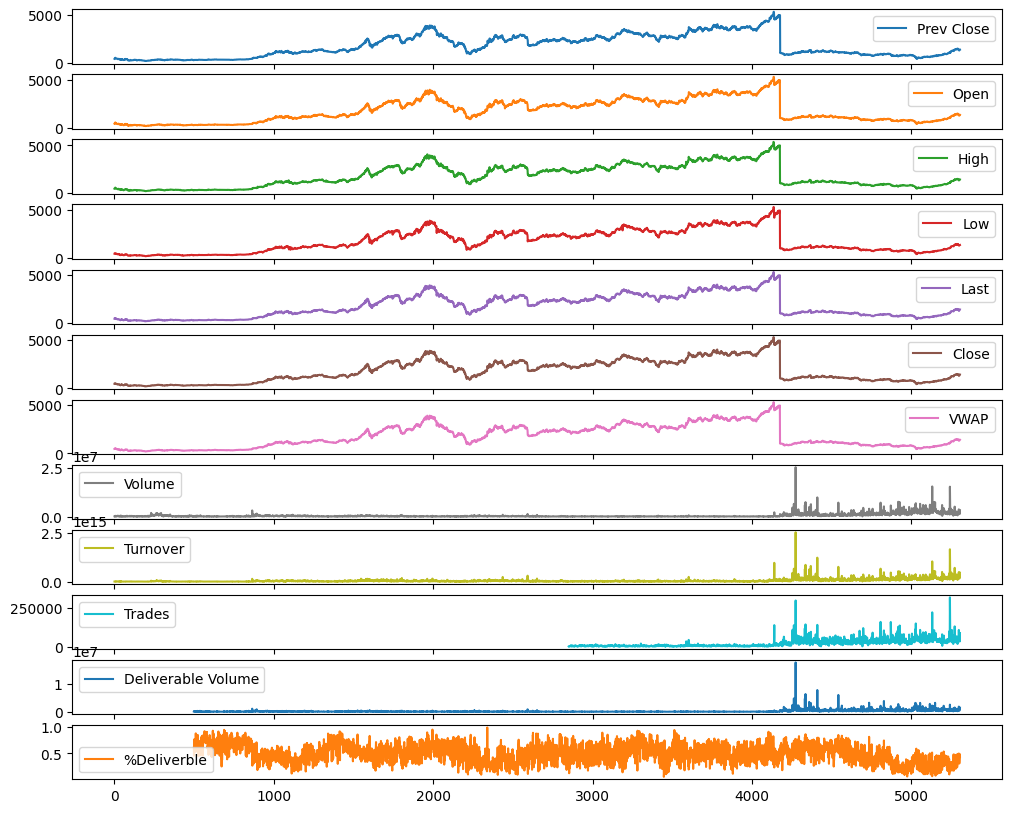

Symbol                   1
Series                   1
Prev Close            4980
Open                  3521
High                  3993
Low                   4133
Last                  3964
Close                 4980
VWAP                  5241
Volume                5273
Turnover              5306
Trades                2346
Deliverable Volume    4752
%Deliverble           3379
dtype: int64

In [271]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [272]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,GRASIM,EQ,405.80,429.9,438.3,425.00,438.3,438.30,432.24,101578,4.390621e+12,NaN,NaN,NaN
1,GRASIM,EQ,438.30,437.5,440.0,420.05,439.5,437.15,428.27,126117,5.401216e+12,NaN,NaN,NaN
2,GRASIM,EQ,437.15,420.1,447.9,412.00,430.0,439.60,436.10,163877,7.146660e+12,NaN,NaN,NaN
3,GRASIM,EQ,439.60,449.9,474.8,449.90,474.8,474.80,474.68,44248,2.100384e+12,NaN,NaN,NaN
4,GRASIM,EQ,474.80,472.0,512.8,472.00,512.8,512.80,512.61,188564,9.666049e+12,NaN,NaN,NaN


      Symbol Series  Prev Close     Open    High      Low     Last    Close  \
0     GRASIM     EQ      405.80   429.90   438.3   425.00   438.30   438.30   
1     GRASIM     EQ      438.30   437.50   440.0   420.05   439.50   437.15   
2     GRASIM     EQ      437.15   420.10   447.9   412.00   430.00   439.60   
3     GRASIM     EQ      439.60   449.90   474.8   449.90   474.80   474.80   
4     GRASIM     EQ      474.80   472.00   512.8   472.00   512.80   512.80   
...      ...    ...         ...      ...     ...      ...      ...      ...   
5301  GRASIM     EQ     1278.10  1285.00  1321.0  1285.00  1320.00  1312.35   
5302  GRASIM     EQ     1312.35  1320.00  1339.2  1308.00  1338.00  1331.20   
5303  GRASIM     EQ     1331.20  1337.45  1349.0  1321.15  1347.25  1341.15   
5304  GRASIM     EQ     1341.15  1354.40  1369.5  1332.30  1352.00  1350.70   
5305  GRASIM     EQ     1350.70  1342.00  1407.4  1333.00  1401.10  1401.75   

         VWAP   Volume      Turnover   Trades  Deli

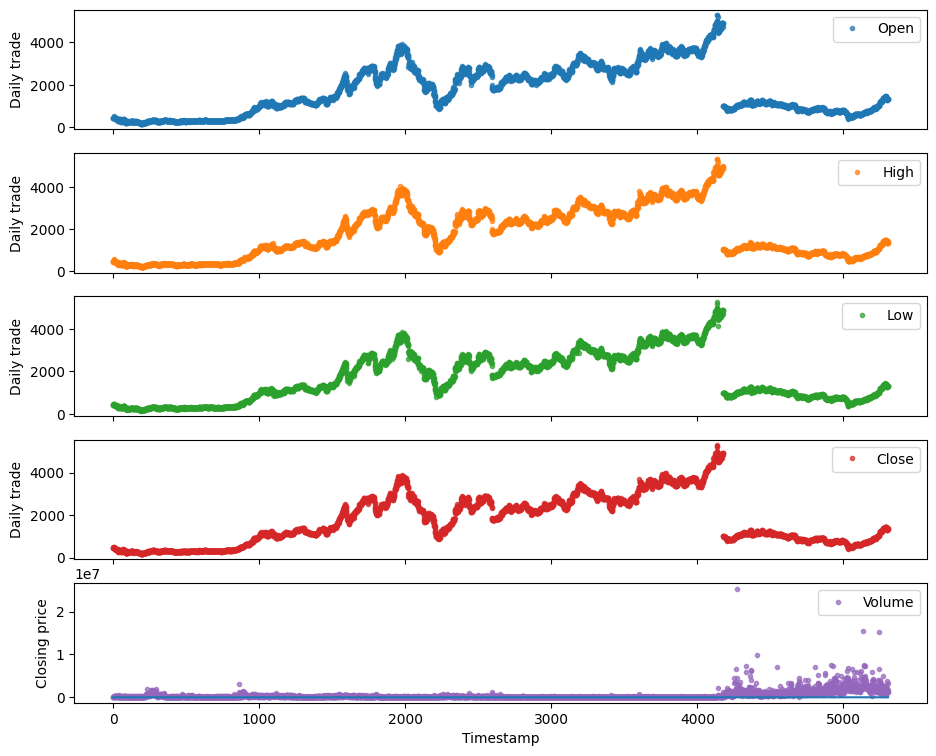

In [273]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [274]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

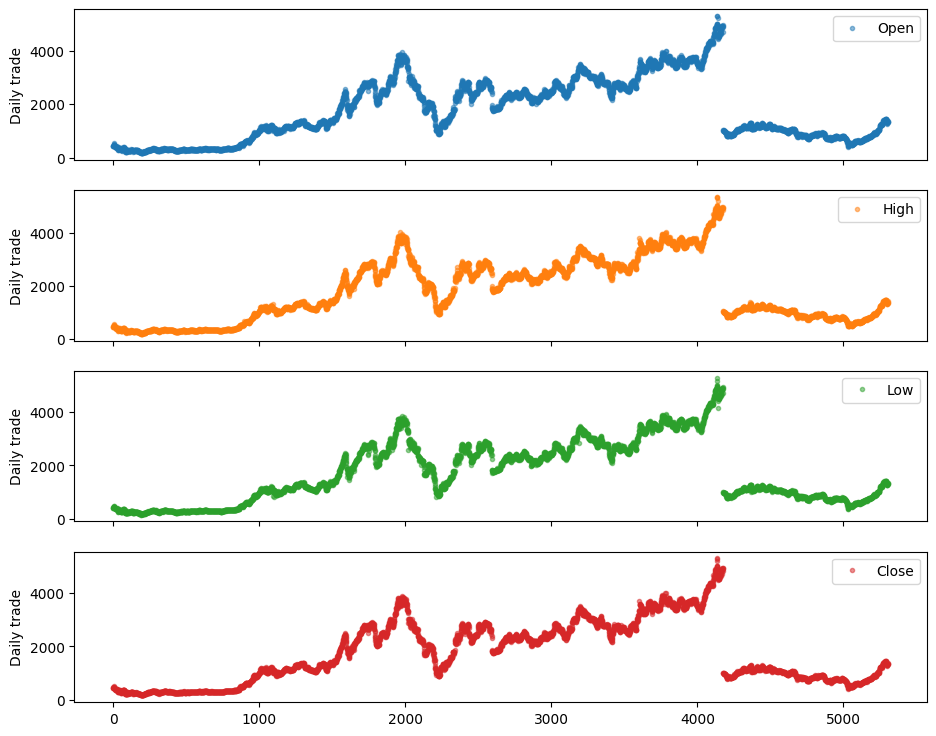

In [275]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

      Symbol Series  Prev Close     Open    High      Low     Last    Close  \
0     GRASIM     EQ      405.80   429.90   438.3   425.00   438.30   438.30   
1     GRASIM     EQ      438.30   437.50   440.0   420.05   439.50   437.15   
2     GRASIM     EQ      437.15   420.10   447.9   412.00   430.00   439.60   
3     GRASIM     EQ      439.60   449.90   474.8   449.90   474.80   474.80   
4     GRASIM     EQ      474.80   472.00   512.8   472.00   512.80   512.80   
...      ...    ...         ...      ...     ...      ...      ...      ...   
5301  GRASIM     EQ     1278.10  1285.00  1321.0  1285.00  1320.00  1312.35   
5302  GRASIM     EQ     1312.35  1320.00  1339.2  1308.00  1338.00  1331.20   
5303  GRASIM     EQ     1331.20  1337.45  1349.0  1321.15  1347.25  1341.15   
5304  GRASIM     EQ     1341.15  1354.40  1369.5  1332.30  1352.00  1350.70   
5305  GRASIM     EQ     1350.70  1342.00  1407.4  1333.00  1401.10  1401.75   

         VWAP   Volume      Turnover   Trades  Deli

,count,mean,std,min,25%,50%,75%,max
Prev Close,5306.0,1.752963e+03,1.152148e+03,1.725000e+02,8.104625e+02,1.357225e+03,2.662750e+03,5.286100e+03
Open,5306.0,1.753666e+03,1.152356e+03,1.702500e+02,8.127000e+02,1.355000e+03,2.668675e+03,5.286000e+03
High,5306.0,1.779806e+03,1.165940e+03,1.768000e+02,8.240125e+02,1.377450e+03,2.700000e+03,5.361050e+03
Low,5306.0,1.726919e+03,1.138712e+03,1.659500e+02,7.986875e+02,1.338550e+03,2.625137e+03,5.266100e+03
Last,5306.0,1.752880e+03,1.151702e+03,1.730000e+02,8.103500e+02,1.359500e+03,2.663750e+03,5.275500e+03
Close,5306.0,1.753151e+03,1.152010e+03,1.725000e+02,8.111750e+02,1.358425e+03,2.662750e+03,5.286100e+03
VWAP,5306.0,1.753952e+03,1.152518e+03,1.734100e+02,8.117775e+02,1.356720e+03,2.668345e+03,5.290460e+03
Volume,5306.0,4.810774e+05,9.504433e+05,5.230000e+02,6.769700e+04,1.360035e+05,4.253732e+05,2.535892e+07
Turnover,5306.0,5.041394e+13,8.393759e+13,1.596022e+10,1.164514e+13,2.466485e+13,5.685606e+13,2.516802e+15
Trades,2456.0,2.171274e+04,2.434556e+04,1.890000e+02,4.710250e+03,9.620000e+03,3.344275e+04,3.166770e+05


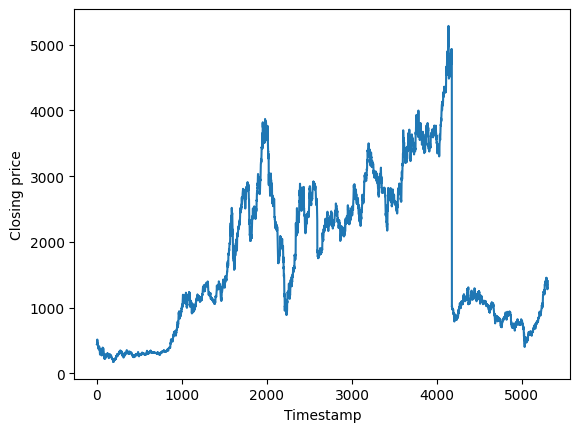

In [276]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [277]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

4163
1041


In [278]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
66/66 [==============================] - 5s 13ms/step - loss: 0.0282 - mse: 0.0282 - mae: 0.1037 - val_loss: 0.0058 - val_mse: 0.0058 - val_mae: 0.0565
Epoch 2/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0432 - val_loss: 0.0022 - val_mse: 0.0022 - val_mae: 0.0319
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0344 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0306
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0317 - val_loss: 0.0018 - val_mse: 0.0018 - val_mae: 0.0301
Epoch 5/100
66/66 [==============================] - 0s 5ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0291 - val_loss: 0.0018 - val_mse: 0.0018 - val_mae: 0.0306
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0270 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0301
Epoch 7/100
66/66 [==

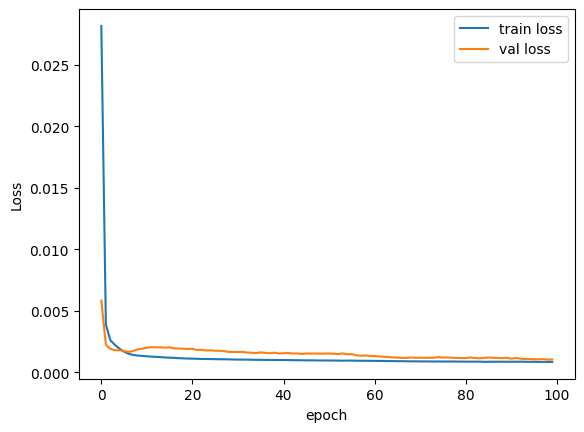

In [279]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

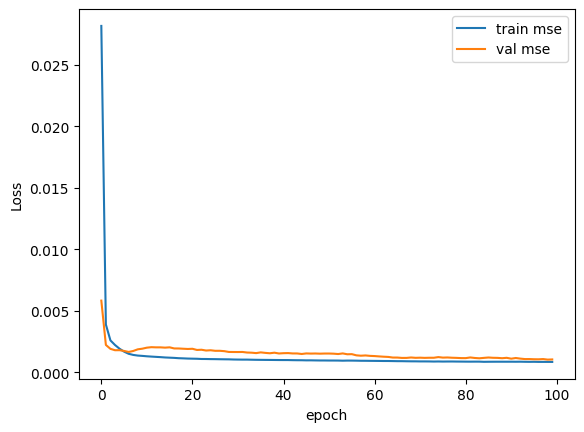

In [280]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

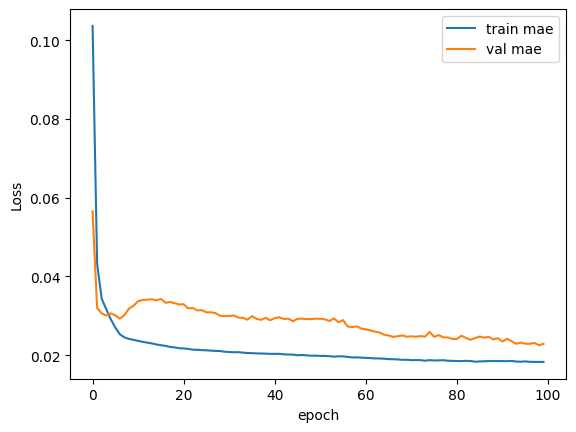

In [281]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_21 (LSTM)              (None, 32)                6272      
                                                                 
 dense_50 (Dense)            (None, 64)                2112      
                                                                 
 dense_51 (Dense)            (None, 64)                4160      
                                                                 
 activation_30 (Activation)  (None, 64)                0         
                                                                 
 dense_52 (Dense)            (None, 64)                4160      
                                                                 
 activation_31 (Activation)  (None, 64)              

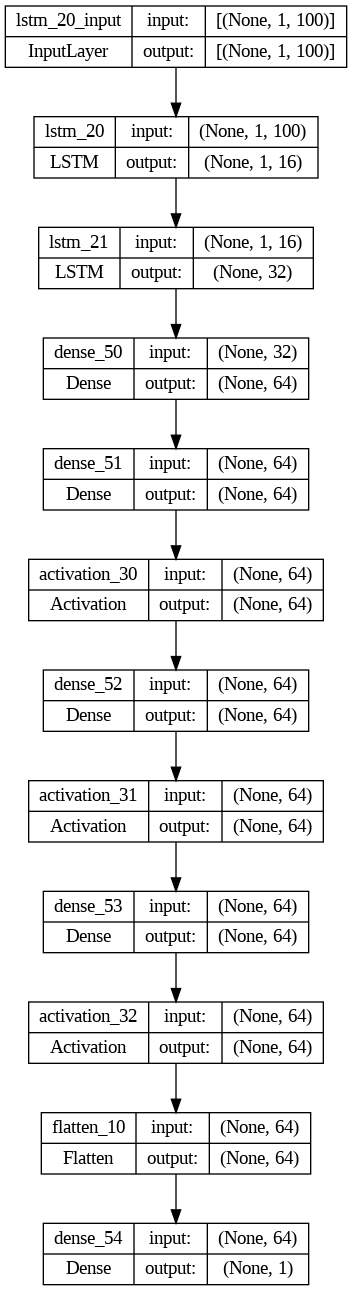

In [282]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [283]:
model.evaluate(test_X, test_Y)

33/33 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0229


[0.0010338660795241594, 0.0010338660795241594, 0.022863343358039856]

In [284]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.991829
R2 Score: 0.989638
Max Error: 0.238970


33/33 [==============================] - 0s 2ms/step


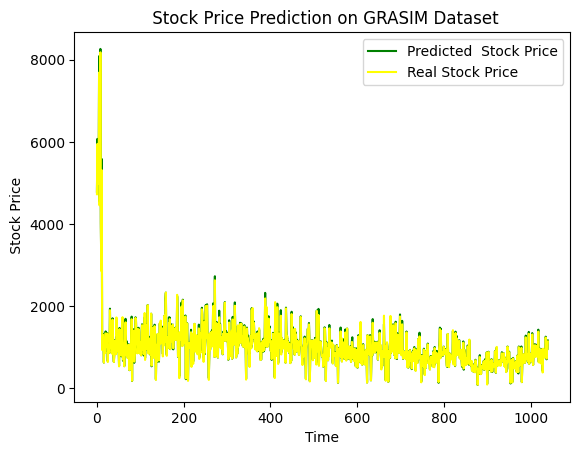

In [285]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on GRASIM Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

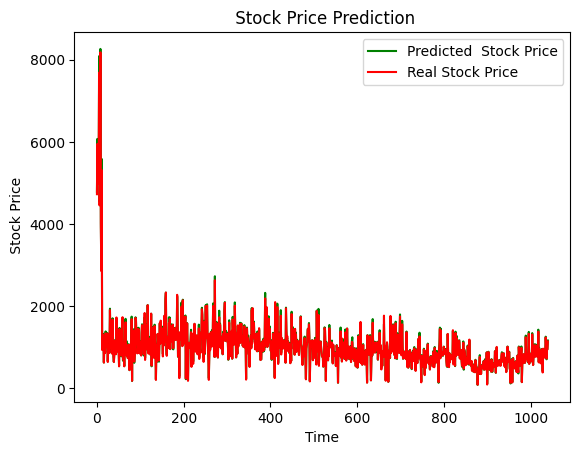

In [286]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [287]:
predicted

array([[4787.913  ],
       [6073.222  ],
       [4981.747  ],
       ...,
       [ 949.10535],
       [ 946.96985],
       [1163.4988 ]], dtype=float32)

In [288]:
test_label

array([[4726.67607472],
       [5951.11738762],
       [4976.36857513],
       ...,
       [ 934.74429077],
       [ 950.84068363],
       [1139.89851987]])

In [289]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

      Actual Price  Predicted Price
0      4726.676075      4787.913086
1      5951.117388      6073.222168
2      4976.368575      4981.747070
3      5460.290754      5509.390137
4      5285.083507      5135.416016
...            ...              ...
1036   1040.601485      1070.684448
1037    723.399589       706.549133
1038    934.744291       949.105347
1039    950.840684       946.969849
1040   1139.898520      1163.498779

[1041 rows x 2 columns]


In [290]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+------+--------------------+--------------------+
|      |    Actual Price    |  Predicted Price   |
+------+--------------------+--------------------+
|  0   | 4726.676074718526  |  4787.9130859375   |
|  1   | 5951.117387616625  |  6073.22216796875  |
|  2   | 4976.3685751321755 |  4981.7470703125   |
|  3   | 5460.290753580646  |  5509.39013671875  |
|  4   | 5285.083507306888  |   5135.416015625   |
|  5   | 7687.657060518732  |  8088.36572265625  |
|  6   | 4454.331979350631  |  4538.9755859375   |
|  7   | 5053.424360927016  |   4969.119140625   |
|  8   | 8181.6102287265585 |  8264.3388671875   |
|  9   | 3968.1913586215987 |  4027.74267578125  |
|  10  | 2855.619322709163  |   2905.861328125   |
|  11  | 5313.873625080248  |    5584.4140625    |
|  12  | 933.0718496405902  |  998.729248046875  |
|  13  | 1256.0086308902346 | 1321.035400390625  |
|  14  |       1301.0       | 1328.078857421875  |
|  15  | 1119.105058562419  | 1140.6942138671875 |
|  16  | 627.0672873465933  | 6

In [291]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_21 (LSTM)              (None, 32)                6272      
                                                                 
 dense_50 (Dense)            (None, 64)                2112      
                                                                 
 dense_51 (Dense)            (None, 64)                4160      
                                                                 
 activation_30 (Activation)  (None, 64)                0         
                                                                 
 dense_52 (Dense)            (None, 64)                4160      
                                                                 
 activation_31 (Activation)  (None, 64)              

In [292]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))